In [6]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

wd = os.path.join("..", "data")

In [7]:
flood = gpd.read_file(os.path.join(wd, "storm_events", "emnati_faranfangana", "flood.gpkg"))
flood_planet = gpd.read_file(os.path.join(wd, "storm_events", "emnati_faranfangana", "flood_planet_final.gpkg"))

<AxesSubplot: >

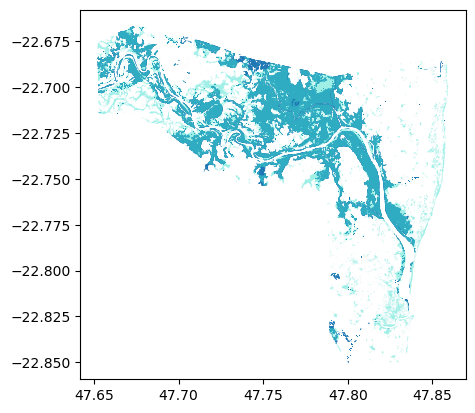

In [8]:
fig, ax = plt.subplots()

flood.plot(ax=ax)
flood_planet.plot(ax=ax, color='turquoise', alpha=0.5)

In [9]:
flood = flood.to_crs(3857)
flood_planet = flood_planet.to_crs(3857)

In [59]:
%%time
flood = flood.dissolve()
flood_planet = flood_planet.dissolve()

CPU times: user 8.49 s, sys: 232 ms, total: 8.73 s
Wall time: 8.72 s


In [60]:
%%time
tp = gpd.overlay(flood, flood_planet, how='intersection')
fp = gpd.overlay(flood, flood_planet, how='difference')
fn = gpd.overlay(flood_planet, flood, how='difference')

/Users/alison/miniconda3/envs/hybridmodels/lib/python3.10/site-packages/pygeos/set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


CPU times: user 4.11 s, sys: 147 ms, total: 4.26 s
Wall time: 4.26 s


/Users/alison/miniconda3/envs/hybridmodels/lib/python3.10/site-packages/geopandas/tools/overlay.py:365: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[is_collection, geom_col] = dissolved[geom_col].values
<timed exec>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1159 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries


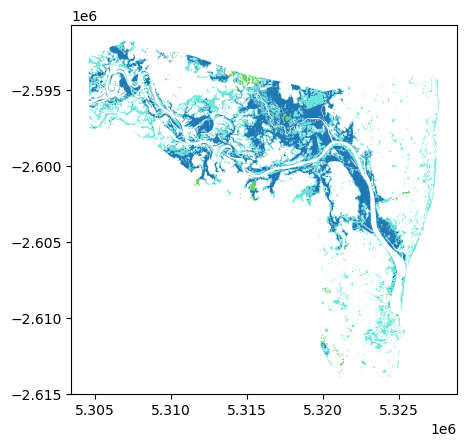

In [79]:
fig, ax = plt.subplots()

tp.plot(ax=ax, label='TP')
fp.plot(ax=ax, color='limegreen', alpha=0.8, label='FP')
fn.plot(ax=ax, color='turquoise', alpha=0.8, label='FN')
fig.savefig(os.path.join(wd, 'storm_events', 'emnati_faranfangana', 'planet_comparison.png'), dpi=200, bbox_inches='tight')

In [64]:
%%time

TP = tp.area
FP = fp.area
FN = fn.area

CPU times: user 8.03 ms, sys: 2.48 ms, total: 10.5 ms
Wall time: 7.25 ms


In [74]:
csi = TP / (TP + FP + FN)
bias = (TP + FP) / (TP + FN)

print(f"CSI: {csi[0]:.2%}, bias: {bias[0]:.2%}")

CSI: 52.39%, bias: 55.80%


In [80]:
hit_rate = TP / (TP + FN)
hit_rate

0    0.535596
dtype: float64